Load packages and data

In [108]:
import numpy as np
import json
import pandas as pd
import pickle
import xarray as xr
import math
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
plt.style.use('dark_background') #Set dark background settings for plt

In [109]:
# EnergyShareX = pickle.load( open( "EnergyShareX.p", "rb" ) )
# PoliticsX = pickle.load( open( "PoliticsX.p", "rb" ) )
# EnergyChangeX = pickle.load( open( "EnergyChangeX.p", "rb" ) )
# RenewChangeX = pickle.load( open( "RenewChangeX.p", "rb" ) )
DoeData = pickle.load( open( "DoeData.p", "rb" ) )

Drop US total, Atlantic, Pacific Offshore, Alaska and Hawai

In [110]:
DoeClean = DoeData[~DoeData["States"].isin(['US','X3','X5',"HI","AS"])] #~ takes the negative matrix basically -all the values that are not in
RenewClean = DoeClean[DoeClean["Energy"]=="Renew"]

Regression Set-Up - Normal OLS

In [111]:
normal_ols = sm.ols(formula='ProductionPercentage ~ DemocraticPercentage',data=RenewClean).fit()
print(normal_ols.summary())

                             OLS Regression Results                             
Dep. Variable:     ProductionPercentage   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     4.249
Date:                  Sat, 13 Oct 2018   Prob (F-statistic):             0.0394
Time:                          18:41:45   Log-Likelihood:                -1185.0
No. Observations:                  2793   AIC:                             2374.
Df Residuals:                      2791   BIC:                             2386.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

Regression Set-Up - FE

In [112]:
RegResults = np.empty(shape=(len(range(1960,2016)),3))
counter = 0
for i in range(1960,2016):
    RenewCleanNew = RenewClean[RenewClean["Years"]>=i]
    FE_ols = sm.ols(formula='ProductionPercentage ~ DemocraticPercentage+C(Years)+C(States)',data=RenewCleanNew).fit()
    #print(i)
    #print(FE_ols.pvalues["DemocraticPercentage"])
    RegResults[counter,0]=i
    RegResults[counter,1]=FE_ols.pvalues["DemocraticPercentage"]
    RegResults[counter,2]=FE_ols.params["DemocraticPercentage"]
    counter += 1


Plot things

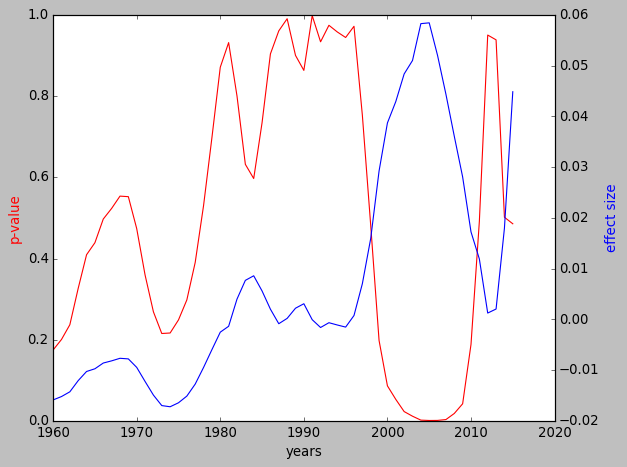

In [126]:
fig, ax1 = plt.subplots()
years = [int(item)for item in RegResults[:,0]]

color="red"
ax1.set_xlabel('years')
ax1.set_ylabel('p-value', color=color)
ax1.plot(years,RegResults[:,1], color=color)
ax1.tick_params(axis='p-value', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('effect size', color=color)  # we already handled the x-label with ax1
ax2.plot(years,RegResults[:,2], color=color)
ax2.tick_params(axis='effect size', labelcolor=color)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('Panel-Change')


2005 onwards analysis

In [ ]:
for i in range(len((RegResults[:,0]))):
    print(str((RegResults[i,0]))+"   "+str((RegResults[i,2]/RegResults[i,1])))

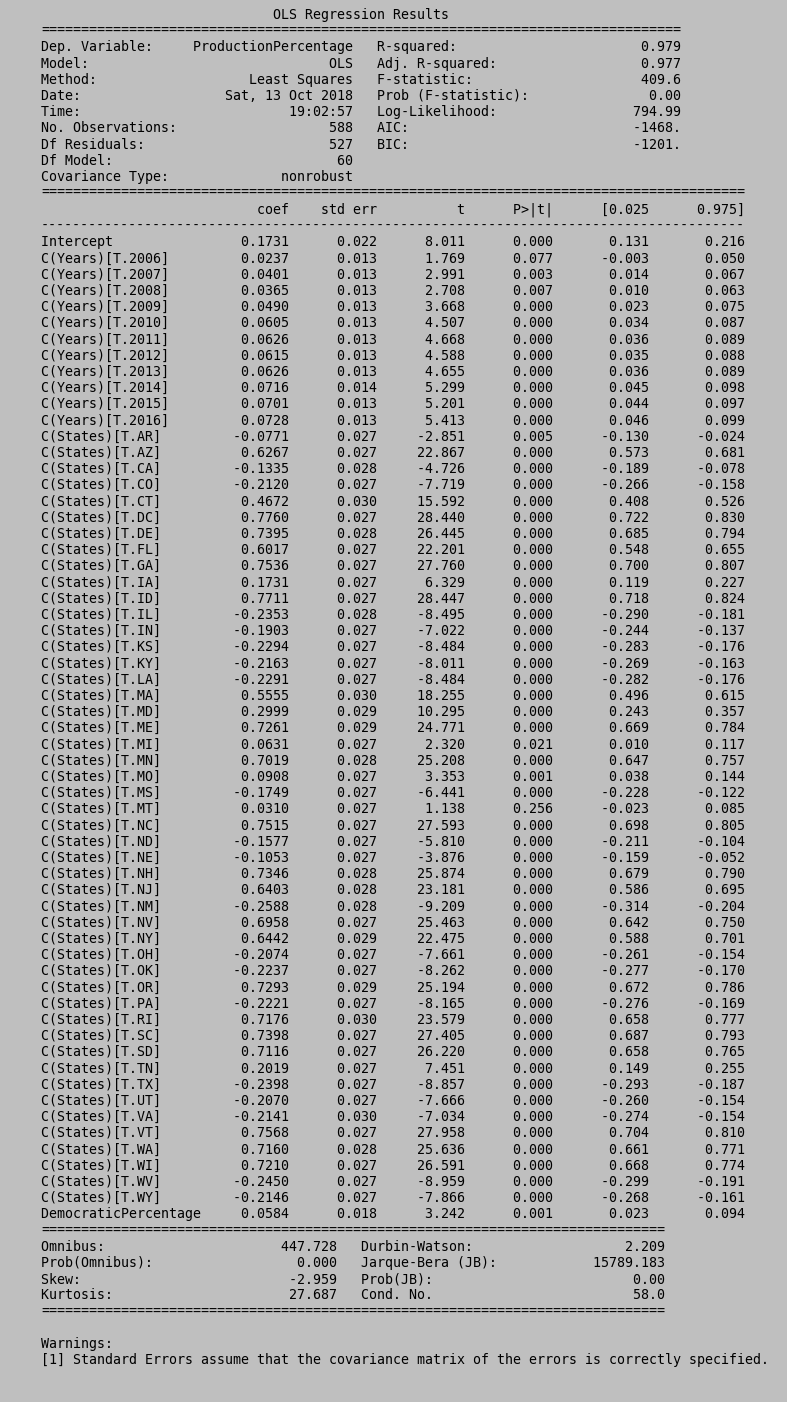

In [160]:
RenewCleanNew = RenewClean[RenewClean["Years"]>=2005]
FE_ols = sm.ols(formula='ProductionPercentage ~ DemocraticPercentage+C(Years)+C(States)',data=RenewCleanNew).fit()
FE_ols.summary()
plt.rc('figure', figsize=(10, 16))
plt.text(0.01, 0.01, str(FE_ols.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('FEModel2005.png')